# Handling overfitting with Ridge regularization 👮👮
Let's work on a real-world dataset that is prone to overfitting. To increase the difficulty, you'll have to make some cleanings in the dataset before training a model. Good luck! 🍀

0. Import usual librairies

0bis. Execute the cell below to load the dataset.

The description of this dataset is contained in the .txt file present in the resources of the exercise.

In [2]:
data = pd.read_csv("https://full-stack-bigdata-datasets.s3.eu-west-3.amazonaws.com/Machine+Learning+Supervis%C3%A9/R%C3%A9gression+r%C3%A9gularis%C3%A9es/news/OnlineNewsPopularity.csv")
data.columns = [name.strip() for name in data.columns]
data = data.sample(1000, random_state = 1)
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
27187,http://mashable.com/2014/06/17/peer-to-peer-bu...,205.0,12.0,1349.0,0.339059,1.0,0.425668,51.0,3.0,33.0,1.0,4.851742,9.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,748.0,213.510000,4800.0,843300.0,429322.222222,1973.866667,7249.931976,3900.350665,1500.0,4800.0,3150.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.022242,0.022368,0.495826,0.437342,0.022222,0.333806,0.072596,0.022239,0.014826,0.600000,0.400000,0.409268,0.050000,1.0,-0.225513,-0.8,-0.076923,0.475000,0.150000,0.025000,0.150000,5200
2277,http://mashable.com/2013/02/14/nba-stats-data/,693.0,10.0,554.0,0.531760,1.0,0.700880,11.0,7.0,1.0,0.0,4.722022,4.0,0.0,1.0,0.0,0.0,0.0,0.0,217.0,434.0,309.750000,2500.0,69100.0,39575.000000,1094.555556,2657.458924,2066.183721,635.0,1500.0,978.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.050003,0.052236,0.050148,0.797612,0.050000,0.489978,0.210050,0.061372,0.018051,0.772727,0.227273,0.437764,0.033333,1.0,-0.287778,-0.5,-0.155556,0.100000,0.000000,0.400000,0.000000,2300
18309,http://mashable.com/2014/01/04/5-most-negative...,369.0,13.0,751.0,0.427793,1.0,0.578475,12.0,1.0,1.0,0.0,4.482024,10.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1300.0,273.772500,0.0,843300.0,317450.000000,0.000000,164725.000000,18698.460446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.818689,0.121280,0.020014,0.020016,0.020001,0.461199,0.170711,0.041278,0.007989,0.837838,0.162162,0.291251,0.050000,0.6,-0.193155,-0.6,-0.050000,0.382143,0.139286,0.117857,0.139286,3300
15731,http://mashable.com/2013/11/06/mobli-carlos-slim/,428.0,12.0,1207.0,0.478898,1.0,0.664804,29.0,0.0,1.0,0.0,4.706711,10.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,3600.0,744.888889,0.0,843300.0,161940.000000,0.000000,3753.379258,2651.783482,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.357806,0.020092,0.361054,0.240867,0.020180,0.411582,0.168799,0.046396,0.014913,0.756757,0.243243,0.400437,0.033333,1.0,-0.250309,-0.6,-0.100000,0.500000,0.500000,0.000000,0.500000,2200
11849,http://mashable.com/2013/08/21/mark-malkoff-sk...,505.0,13.0,329.0,0.616564,1.0,0.765000,5.0,2.0,0.0,1.0,5.130699,7.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,438.0,180.000000,0.0,843300.0,149757.142857,0.000000,3838.169028,2552.307502,13100.0,13100.0,13100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.425547,0.028586,0.345513,0.028645,0.171709,0.449601,0.084304,0.033435,0.015198,0.687500,0.312500,0.321488,0.136364,0.5,-0.243333,-0.5,-0.050000,0.000000,0.000000,0.500000,0.000000,5200


1. Take a moment to display data info in order to check for missing values. 

We won't use the "url" column : you have to drop it.
Also just from the variables names we can anticipate that a number of variables will be exactly correlated, remove those variables. Remove also "LDA_00", "rate_positive_words", "n_non_stop_words", that are also near collinear when given a small sample of data.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 27187 to 25040
Data columns (total 61 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   url                            1000 non-null   object 
 1   timedelta                      1000 non-null   float64
 2   n_tokens_title                 1000 non-null   float64
 3   n_tokens_content               1000 non-null   float64
 4   n_unique_tokens                1000 non-null   float64
 5   n_non_stop_words               1000 non-null   float64
 6   n_non_stop_unique_tokens       1000 non-null   float64
 7   num_hrefs                      1000 non-null   float64
 8   num_self_hrefs                 1000 non-null   float64
 9   num_imgs                       1000 non-null   float64
 10  num_videos                     1000 non-null   float64
 11  average_token_length           1000 non-null   float64
 12  num_keywords                   1000 non-nul

Dropping columns:  ['url', 'weekday_is_sunday', 'is_weekend', 'LDA_00', 'rate_positive_words', 'n_non_stop_words']
...Done!


2. Display a graph with the distribution of the variable shares, what can you conclude from this graph?

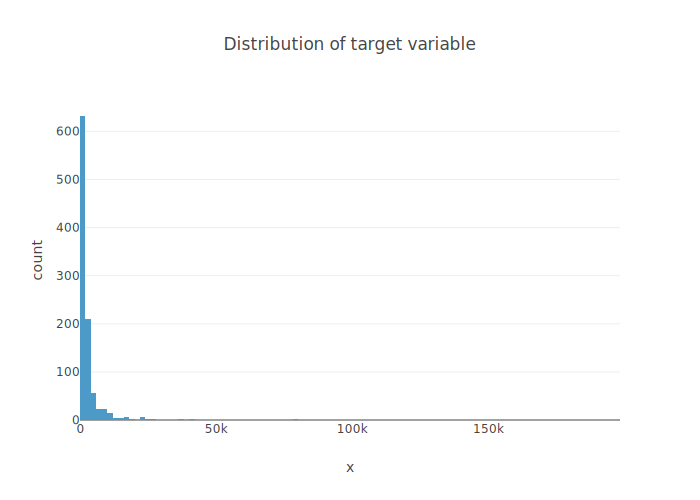

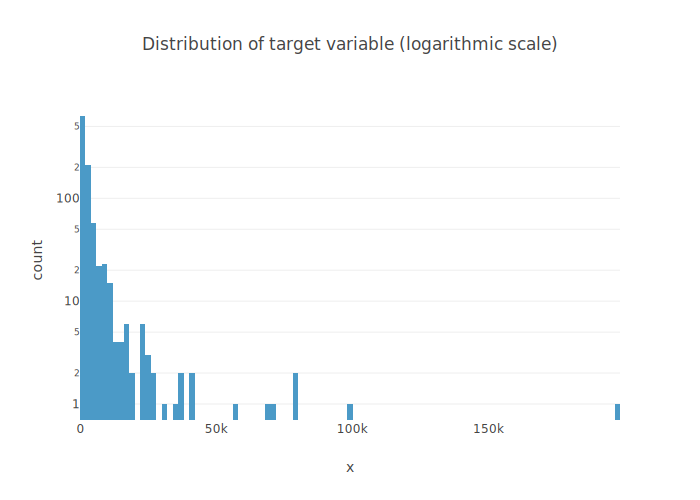

The graph of the target variable's distribution indicates that the disribution is extremely skewed, very few very high values are present which would cause our data to be extremely hard to model. Therefore we need to exclude from the dataset the rows where Y takes extremely high values. In this type of situation it is common to convert the target variable to a logarithmic scale.

2.bis Create a dataframe containing the explanatory variables and another one containing only the target variable, which is the number of shares. Convert y to logarithmic scale using np.log10

27187    3.716003
2277     3.361728
18309    3.518514
15731    3.342423
11849    3.716003
Name: shares, dtype: float64

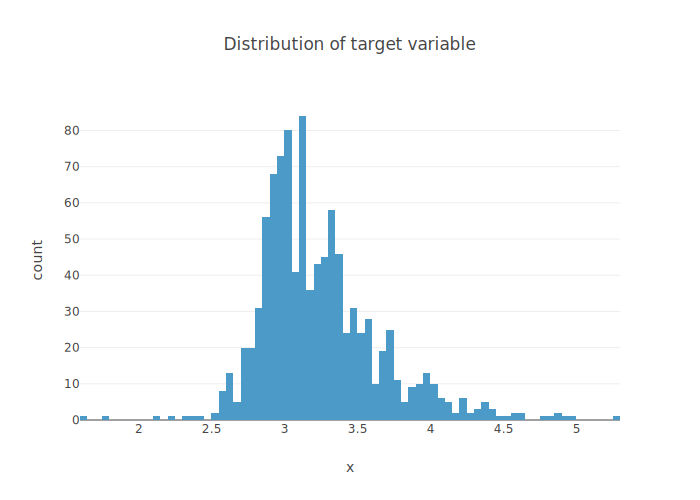

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
27187,205.0,12.0,1349.0,0.339059,0.425668,51.0,3.0,33.0,1.0,4.851742,9.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.0,748.0,213.510000,4800.0,843300.0,429322.222222,1973.866667,7249.931976,3900.350665,1500.0,4800.0,3150.0,0.0,1.0,0.0,0.0,0.0,0.0,0.022368,0.495826,0.437342,0.022222,0.333806,0.072596,0.022239,0.014826,0.400000,0.409268,0.050000,1.0,-0.225513,-0.8,-0.076923,0.475000,0.150000,0.025000,0.150000
2277,693.0,10.0,554.0,0.531760,0.700880,11.0,7.0,1.0,0.0,4.722022,4.0,0.0,1.0,0.0,0.0,0.0,0.0,217.0,434.0,309.750000,2500.0,69100.0,39575.000000,1094.555556,2657.458924,2066.183721,635.0,1500.0,978.0,0.0,0.0,0.0,1.0,0.0,0.0,0.052236,0.050148,0.797612,0.050000,0.489978,0.210050,0.061372,0.018051,0.227273,0.437764,0.033333,1.0,-0.287778,-0.5,-0.155556,0.100000,0.000000,0.400000,0.000000
18309,369.0,13.0,751.0,0.427793,0.578475,12.0,1.0,1.0,0.0,4.482024,10.0,0.0,0.0,1.0,0.0,0.0,0.0,-1.0,1300.0,273.772500,0.0,843300.0,317450.000000,0.000000,164725.000000,18698.460446,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.121280,0.020014,0.020016,0.020001,0.461199,0.170711,0.041278,0.007989,0.162162,0.291251,0.050000,0.6,-0.193155,-0.6,-0.050000,0.382143,0.139286,0.117857,0.139286
15731,428.0,12.0,1207.0,0.478898,0.664804,29.0,0.0,1.0,0.0,4.706711,10.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,3600.0,744.888889,0.0,843300.0,161940.000000,0.000000,3753.379258,2651.783482,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.020092,0.361054,0.240867,0.020180,0.411582,0.168799,0.046396,0.014913,0.243243,0.400437,0.033333,1.0,-0.250309,-0.6,-0.100000,0.500000,0.500000,0.000000,0.500000
11849,505.0,13.0,329.0,0.616564,0.765000,5.0,2.0,0.0,1.0,5.130699,7.0,0.0,0.0,0.0,1.0,0.0,0.0,4.0,438.0,180.000000,0.0,843300.0,149757.142857,0.000000,3838.169028,2552.307502,13100.0,13100.0,13100.0,0.0,0.0,1.0,0.0,0.0,0.0,0.028586,0.345513,0.028645,0.171709,0.449601,0.084304,0.033435,0.015198,0.312500,0.321488,0.136364,0.5,-0.243333,-0.5,-0.050000,0.000000,0.000000,0.500000,0.000000


2bis. Produce a list giving the indices of all couples of variables that are correlated above 90%

[('n_non_stop_unique_tokens', 'n_unique_tokens'),
 ('n_unique_tokens', 'n_non_stop_unique_tokens'),
 ('kw_avg_min', 'kw_max_min'),
 ('kw_max_min', 'kw_avg_min'),
 ('self_reference_avg_sharess', 'self_reference_min_shares'),
 ('self_reference_min_shares', 'self_reference_avg_sharess')]

2ter. Remove from X all variables that are correlated above 90%. Create an object X_clean that only contains the variables you would like to keep.

Columns to be dropped: ['n_non_stop_unique_tokens', 'kw_avg_min', 'self_reference_avg_sharess']


Remaining columns:
Index(['timedelta', 'n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'num_hrefs', 'num_self_hrefs', 'num_imgs', 'num_videos',
       'average_token_length', 'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_min_max',
       'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg', 'kw_avg_avg',
       'self_reference_min_shares', 'self_reference_max_shares',
       'weekday_is_monday', 'weekday_is_tuesday', 'weekday_is_wednesday',
       'weekday_is_thursday', 'weekday_is_friday', 'weekday_is_saturday',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negative_words', 'rate_negative_words',
       'avg_positive_polarity', 'min_positive_polarity',
       'max_positive_polari

3. Are the different variables in your dataset on the same scale ? Verify this by using the describe method.

,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,350.293000,10.484000,540.058000,0.533191,10.799000,3.19400,4.570000,1.24000,4.567762,7.206000,0.044000,0.186000,0.157000,0.052000,0.173000,0.218000,25.368000,1254.721770,14428.739000,758316.500000,262850.186592,1103.949210,6067.834469,3206.275802,4118.742000,10103.527000,0.156000,0.20800,0.176000,0.18000,0.15000,0.060000,0.150211,0.214289,0.235232,0.215650,0.448697,0.121016,0.040191,0.017116,0.293762,0.359513,0.100505,0.764513,-0.254494,-0.510839,-0.102380,0.277957,0.069438,0.353569,0.152021
std,212.748695,2.092396,465.540633,0.129250,11.115402,3.39085,8.918556,4.55754,0.767052,1.882314,0.205198,0.389301,0.363983,0.222138,0.378437,0.413094,68.809704,4912.033969,62271.147325,205613.603713,135270.402539,1134.930216,8442.567738,1542.816273,21176.366006,34783.527985,0.363037,0.40608,0.381011,0.38438,0.35725,0.237606,0.228773,0.274843,0.301203,0.280740,0.112302,0.096882,0.017710,0.011203,0.156119,0.104204,0.078553,0.239552,0.119911,0.285152,0.083702,0.331816,0.268229,0.185251,0.231603
min,9.000000,5.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.020000,0.020000,0.020000,0.020000,0.000000,-0.369336,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000
25%,165.000000,9.000000,241.750000,0.473558,4.000000,1.00000,1.000000,0.00000,4.488171,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,451.750000,0.000000,843300.000000,176207.500000,0.000000,3572.024822,2422.693612,634.750000,1100.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.025013,0.028572,0.028572,0.028573,0.399356,0.063015,0.029592,0.010403,0.200000,0.306473,0.050000,0.600000,-0.319729,-0.700000,-0.125000,0.000000,0.000000,0.186458,0.000000
50%,328.500000,10.000000,408.500000,0.538990,7.000000,3.00000,1.000000,0.00000,4.646244,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,651.000000,1450.000000,843300.000000,245102.083334,1051.625000,4447.847358,2891.920271,1200.000000,2900.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.033359,0.040006,0.040004,0.040003,0.452455,0.120761,0.038814,0.015609,0.285714,0.363016,0.100000,0.800000,-0.250000,-0.500000,-0.100000,0.066667,0.000000,0.500000,0.000000
75%,532.000000,12.000000,

3bis. Use the `train_test_split` command from the `sklearn.model_selection` package to create a training sample containing 70% of the observations and a test sample containing 30% of the observations. Make sure to have used the data you just cleaned.

3ter. Is it important to normalize data before training a regularized model? If yes normalize your data.

4. Train a non-regularized linear regression model. Are the performances satisfying?

Train model...
...Done.
R2 score on training set :  0.179320757125781
R2 score on test set :  -0.009363533463855545


5. What could you do to improve the quality of the model?

6. Train a Ridge model by making a grid search to find the optimal value of $\alpha$. Try values from 0 to 1000 with a step of 10, use a value of 10 as the "cv" parameter and a value of 1 for the "verbose" parameter.

Grid search...
Fitting 10 folds for each of 100 candidates, totalling 1000 fits
...Done.
Best hyperparameters :  {'alpha': 680}
Best R2 score :  0.07005730649132719


7. What is the score on the test set obtained using this optimal alpha parameter?

R2 score on training set :  0.1311537250018473
R2 score on test set :  0.06017363301422729


8. Is the test R2 **significantly** different from the train R2? Use cross-validation to answer.

The cross-validated R2-score is :  0.07005730649132719
The standard deviation is :  0.039609309193320646
